# 在小型数据集上从头开始训练一个卷积神经网络

数据集：[Dogs vs. Cats](https://www.kaggle.com/c/dogs-vs-cats)

In [3]:
import os
import shutil

root_dir = '/Users/wjj/datasets/kaggle/dogsvscats'
samples_dir = os.path.join(root_dir, 'train')

mini_samples_dir = os.path.join(root_dir, 'mini_samples')

train_dir = os.path.join(mini_samples_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(mini_samples_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_dir = os.path.join(mini_samples_dir, 'test')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

## 删除目录
if os.path.exists(mini_samples_dir):
    shutil.rmtree(mini_samples_dir)

## 创建目录
dirs = [mini_samples_dir, 
        train_dir, train_cats_dir, train_dogs_dir, 
        validation_dir, validation_cats_dir, validation_dogs_dir,
        test_dir, test_cats_dir, test_dogs_dir]
for d in dirs:
    os.mkdir(d)

In [4]:
## 拷贝图片
def copy_images(filename_format, begin_index, end_index, dest_dir, src_dir=samples_dir):
    image_paths = (os.path.join(src_dir, filename_format.format(index)) for index in range(begin_index, end_index+1))
    for image_path in image_paths:
        shutil.copy(image_path, dest_dir)

cat_filename_format = 'cat.{}.jpg'
dog_filename_format = 'dog.{}.jpg'

copy_images(cat_filename_format, 1, 1000, train_cats_dir)
copy_images(dog_filename_format, 1, 1000, train_dogs_dir)
copy_images(cat_filename_format, 1001, 1500, validation_cats_dir)
copy_images(dog_filename_format, 1001, 1500, validation_dogs_dir)
copy_images(cat_filename_format, 1501, 2000, test_cats_dir)
copy_images(dog_filename_format, 1501, 2000, test_dogs_dir)

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(150, 150),
                                                              batch_size=20,
                                                              class_mode='binary')

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
data_batch, labels_batch = train_generator[0]
print('data batch shape:', data_batch.shape)
print('labels batch shape:', labels_batch.shape)

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [7]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)

# model.save('cats_and_dogs_small_1.h5')

Epoch 1/20
100/100 [==============================] - 58s 585ms/step - loss: 0.6874 - acc: 0.5415 - val_loss: 0.6805 - val_acc: 0.5120
Epoch 2/20
100/100 [==============================] - 63s 635ms/step - loss: 0.6509 - acc: 0.6110 - val_loss: 0.6663 - val_acc: 0.5750
Epoch 3/20
100/100 [==============================] - 64s 636ms/step - loss: 0.6069 - acc: 0.6755 - val_loss: 0.6122 - val_acc: 0.6510
Epoch 4/20
100/100 [==============================] - 59s 588ms/step - loss: 0.5704 - acc: 0.7060 - val_loss: 0.5940 - val_acc: 0.6840
Epoch 5/20
100/100 [==============================] - 59s 591ms/step - loss: 0.5364 - acc: 0.7350 - val_loss: 0.6033 - val_acc: 0.6690
Epoch 6/20
100/100 [==============================] - 61s 611ms/step - loss: 0.5048 - acc: 0.7510 - val_loss: 0.6265 - val_acc: 0.6800
Epoch 7/20
100/100 [==============================] - 60s 602ms/step - loss: 0.4822 - acc: 0.7575 - val_loss: 0.5622 - val_acc: 0.7070
Epoch 8/20
100/100 [==============================] - 6

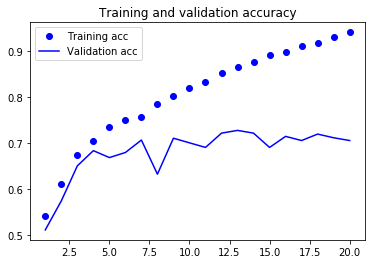

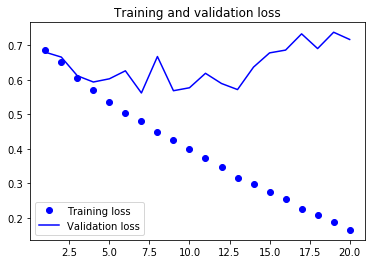

In [10]:
import matplotlib.pyplot as plt

def draw_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    
draw_history(history)

## 使用数据增强

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

# model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 89s 887ms/step - loss: 0.6929 - acc: 0.5178 - val_loss: 0.6815 - val_acc: 0.5380
Epoch 2/100
100/100 [==============================] - 93s 933ms/step - loss: 0.6848 - acc: 0.5531 - val_loss: 0.6742 - val_acc: 0.5490
Epoch 3/100
100/100 [==============================] - 98s 975ms/step - loss: 0.6698 - acc: 0.5875 - val_loss: 0.6521 - val_acc: 0.6100
Epoch 4/100
100/100 [==============================] - 98s 976ms/step - loss: 0.6507 - acc: 0.6156 - val_loss: 0.6441 - val_acc: 0.6190
Epoch 5/100
100/100 [==============================] - 91s 910ms/step - loss: 0.6381 - acc: 0.6381 - val_loss: 0.6303 - val_acc: 0.6320
Epoch 6/100
100/100 [==============================] - 90s 897ms/step - loss: 0.6172 - acc: 0.6662 - val_loss: 0.5759 - val_acc: 0.7010
Epoch 7/100
100/100 [==============================] - 91s 907ms/step - loss: 0.6153 - acc: 0.6553 -

100/100 [==============================] - 88s 879ms/step - loss: 0.3957 - acc: 0.8244 - val_loss: 0.4644 - val_acc: 0.7970
Epoch 61/100
100/100 [==============================] - 88s 883ms/step - loss: 0.4031 - acc: 0.8147 - val_loss: 0.5339 - val_acc: 0.7580
Epoch 62/100
100/100 [==============================] - 88s 879ms/step - loss: 0.4048 - acc: 0.8141 - val_loss: 0.4232 - val_acc: 0.8060
Epoch 63/100
100/100 [==============================] - 88s 880ms/step - loss: 0.3972 - acc: 0.8225 - val_loss: 0.4476 - val_acc: 0.8000
Epoch 64/100
100/100 [==============================] - 88s 880ms/step - loss: 0.3833 - acc: 0.8350 - val_loss: 0.4457 - val_acc: 0.8020
Epoch 65/100
100/100 [==============================] - 88s 878ms/step - loss: 0.3921 - acc: 0.8219 - val_loss: 0.4305 - val_acc: 0.8160
Epoch 66/100
100/100 [==============================] - 89s 885ms/step - loss: 0.3952 - acc: 0.8169 - val_loss: 0.4442 - val_acc: 0.8200
Epoch 67/100
100/100 [==============================] 

> 在我的MacBook Pro上花了2个半小时

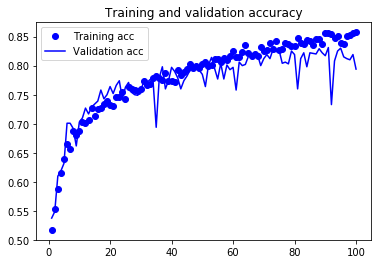

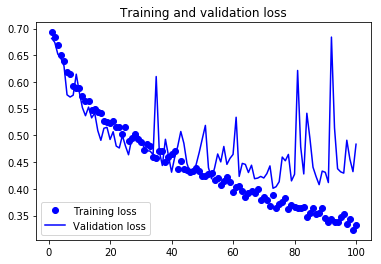

In [13]:
draw_history(history)